In [1]:
from apps.generalizedshallowwater import generalized_shallow_water
from apps.generalizedshallowwater.torrilhonexample import torrilhon_example
from pydogpack import main
from pydogpack.tests.utils import utils
from pydogpack.utils import dg_utils
from pydogpack.utils import math_utils
from pydogpack.utils import x_functions
from pydogpack.visualize import plot

from IPython.display import HTML

# Torrilhon Example

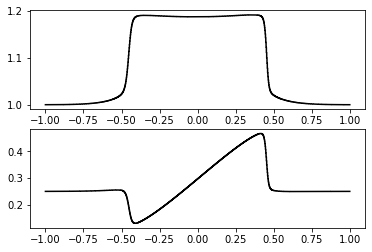

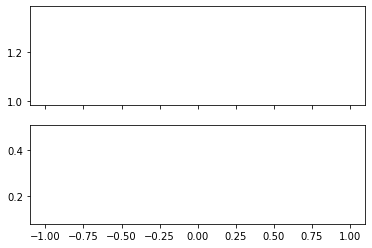

In [14]:
num_moments = 0

gravity_constant = 1.0
kinematic_viscosity = 0.0
slip_length = 0.0

displacement = 0.5
velocity = 0.25
linear_coefficient = 0.25
quadratic_coefficient = 0.0
cubic_coefficient = 0.0

max_height = 1.4

problem = torrilhon_example.TorrilhonExample(
    num_moments,
    gravity_constant,
    kinematic_viscosity,
    slip_length,
    displacement,
    velocity,
    linear_coefficient,
    quadratic_coefficient,
    cubic_coefficient,
    max_height,
)

time_final = 2.0
problem.parameters["time_final"] = time_final
problem.parameters["is_weak"] = True

space_time_order = 1
problem.parameters["time_stepping"]["time_stepping_class"] = "explicit_runge_kutta"
problem.parameters["time_stepping"]["is_verbose"] = False
problem.parameters["time_stepping"]["order"] = space_time_order

num_elems = 1000
x_left = -1.0
x_right = 1.0
problem.parameters["mesh"]["mesh_class"] = "mesh_1d_uniform"
problem.parameters["mesh"]["x_left"] = x_left
problem.parameters["mesh"]["x_right"] = x_right
problem.parameters["mesh"]["num_elems"] = num_elems

problem.parameters["basis"]["basis_class"] = "legendre"
problem.parameters["basis"]["inner_product_constant"] = 0.5
problem.parameters["basis"]["num_basis_cpts"] = space_time_order

problem.parameters["boundary_condition"]["boundary_condition_class"] = "periodic"
problem.parameters["riemann_solver"]["riemann_solver_class"] = "local_lax_friedrichs"

#cfl = dg_utils.standard_cfls(space_time_order)
cfl = 0.5
problem.parameters["delta_t"] = float(dg_utils.get_delta_t(cfl, problem.max_wavespeed, (x_right - x_left) / num_elems))

final_solution = main.run(problem)
p = plot.create_plot_dg(final_solution)
ani, fig = plot.create_animation_output_dir(problem.output_dir)
HTML(ani.to_html5_video())

## Discontinuous Galerkin Test with Local Lax Friedrichs Riemann Solver

### Wrong wave speeds in linear coefficient

In [33]:
num_moments = 1

gravity_constant = 1.0
kinematic_viscosity = 0.0
slip_length = 0.0

displacement = 0.5
velocity = 0.25
linear_coefficient = 0.25
quadratic_coefficient = 0.0
cubic_coefficient = 0.0

max_height = 1.4

problem = torrilhon_example.TorrilhonExample(
    num_moments,
    gravity_constant,
    kinematic_viscosity,
    slip_length,
    displacement,
    velocity,
    linear_coefficient,
    quadratic_coefficient,
    cubic_coefficient,
    max_height,
)

time_final = 2.0
problem.parameters["time_final"] = time_final
problem.parameters["is_weak"] = True

space_time_order = 1
problem.parameters["time_stepping"]["time_stepping_class"] = "explicit_runge_kutta"
problem.parameters["time_stepping"]["is_verbose"] = False
problem.parameters["time_stepping"]["order"] = space_time_order

num_elems = 1000
x_left = -1.0
x_right = 1.0
problem.parameters["mesh"]["mesh_class"] = "mesh_1d_uniform"
problem.parameters["mesh"]["x_left"] = x_left
problem.parameters["mesh"]["x_right"] = x_right
problem.parameters["mesh"]["num_elems"] = num_elems

problem.parameters["basis"]["basis_class"] = "legendre"
problem.parameters["basis"]["inner_product_constant"] = 0.5
problem.parameters["basis"]["num_basis_cpts"] = space_time_order

problem.parameters["boundary_condition"]["boundary_condition_class"] = "periodic"
problem.parameters["riemann_solver"]["riemann_solver_class"] = "local_lax_friedrichs"

#cfl = dg_utils.standard_cfls(space_time_order)
cfl = 0.5
problem.parameters["delta_t"] = float(dg_utils.get_delta_t(cfl, problem.max_wavespeed, (x_right - x_left) / num_elems))

final_solution = main.run(problem)

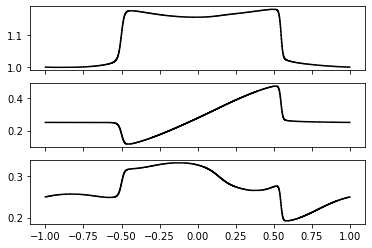

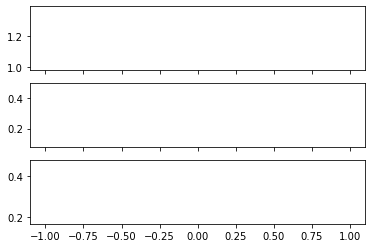

In [34]:
p = plot.create_plot_dg(final_solution)
ani, fig = plot.create_animation_output_dir(problem.output_dir)
HTML(ani.to_html5_video())

## Finite Volume Test

In [30]:
num_moments = 1

gravity_constant = 1.0
kinematic_viscosity = 0.0
slip_length = 0.0

displacement = 0.5
velocity = 0.25
linear_coefficient = 0.25
quadratic_coefficient = 0.0
cubic_coefficient = 0.0

max_height = 1.4

problem = torrilhon_example.TorrilhonExample(
    num_moments,
    gravity_constant,
    kinematic_viscosity,
    slip_length,
    displacement,
    velocity,
    linear_coefficient,
    quadratic_coefficient,
    cubic_coefficient,
    max_height,
)

problem.output_dir = "finite_volume_reference"

time_final = 2.0
problem.parameters["time_final"] = time_final
problem.parameters["is_weak"] = True
problem.parameters["use_wave_propogation_method"] = True

space_time_order = 1
problem.parameters["time_stepping"]["time_stepping_class"] = "explicit_runge_kutta"
problem.parameters["time_stepping"]["is_verbose"] = False
problem.parameters["time_stepping"]["order"] = space_time_order
problem.parameters["time_stepping"]["num_frames"] = 30

num_elems = 1000
x_left = -1.0
x_right = 1.0
problem.parameters["mesh"]["mesh_class"] = "mesh_1d_uniform"
problem.parameters["mesh"]["x_left"] = x_left
problem.parameters["mesh"]["x_right"] = x_right
problem.parameters["mesh"]["num_elems"] = num_elems

problem.parameters["basis"]["basis_class"] = "legendre"
problem.parameters["basis"]["inner_product_constant"] = 0.5
problem.parameters["basis"]["num_basis_cpts"] = space_time_order

problem.parameters["boundary_condition"]["boundary_condition_class"] = "periodic"
problem.parameters["fluctuation_solver"]["fluctuation_solver_class"] = "roe"

#cfl = dg_utils.standard_cfls(space_time_order)
cfl = 0.5
problem.parameters["delta_t"] = float(dg_utils.get_delta_t(cfl, problem.max_wavespeed, (x_right - x_left) / num_elems))

final_solution = main.run(problem)

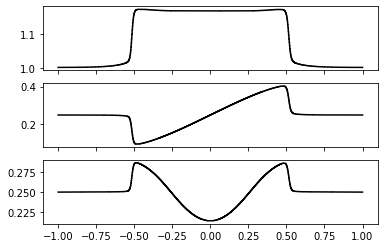

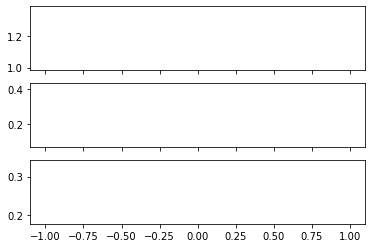

In [31]:
p = plot.create_plot_dg(final_solution, transformation=generalized_shallow_water.get_primitive_variables)
ani, fig = plot.create_animation_output_dir("finite_volume_reference", transformation=generalized_shallow_water.get_primitive_variables)
HTML(ani.to_html5_video())